In [1]:
# Importing all necessary Python libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [5]:
# Loading in the raw patient dataset
df = pd.read_csv("cleaned_patients.csv")

# Viewing the top few rows to understand structure
df.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,0.036310,0.018155,2,0.036310,09/06/2020,1,2,0.998516,2,1,...,2,2,2,2,2,2,2,2,3,2.0
1,0.049860,0.024930,1,0.049860,9999-99-99,2,1,0.997199,2,2,...,2,2,2,2,2,2,2,2,3,2.0
2,0.053877,0.026939,1,0.053877,9999-99-99,2,2,0.996729,2,1,...,2,2,1,2,2,1,2,2,3,2.0
3,0.079430,0.039715,1,0.079430,9999-99-99,2,2,0.992877,2,2,...,2,2,2,2,2,2,2,2,3,2.0
4,0.082690,0.041345,2,0.082690,9999-99-99,2,2,0.992278,2,2,...,2,2,2,2,2,2,2,2,3,2.0


In [7]:
# Replacing '?' with NaN so we can handle missing values properly
df.replace('?', np.nan, inplace=True)

# Converting all numeric columns to proper float type
df = df.apply(pd.to_numeric, errors='ignore')

# Filling missing numeric values with column means
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Filling missing categorical values with the most frequent value
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Checking for any remaining missing values
df.isnull().sum()


C:\Users\jayde\AppData\Local\Temp\ipykernel_11664\228198216.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [9]:
# Selecting clinical features and target variable
features = ['AGE', 'OBESITY', 'TOBACCO', 'HIPERTENSION', 'DIABETES']
X = df[features]
y = df['ICU']


In [27]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Training a basic Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Making predictions and showing evaluation metrics
y_pred = rf_model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[   77  3119]
 [  301 35409]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.20      0.02      0.04      3196
         2.0       0.92      0.99      0.95     35710

    accuracy                           0.91     38906
   macro avg       0.56      0.51      0.50     38906
weighted avg       0.86      0.91      0.88     38906



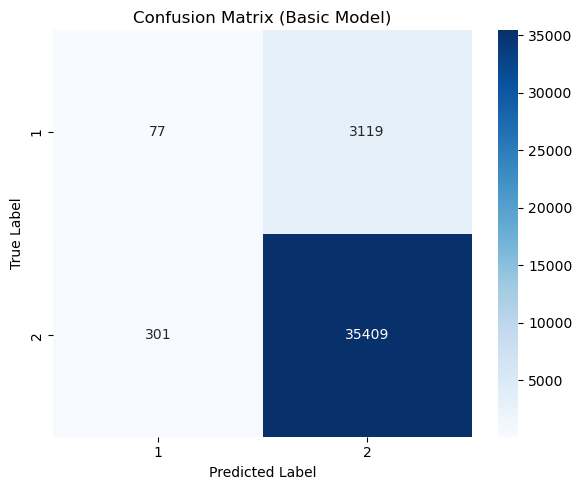

In [17]:
# Visualising the Confusion Matrix for the Basic Model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Getting confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting heatmap for better visual interpretation
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2], yticklabels=[1, 2])
plt.title("Confusion Matrix (Basic Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [19]:
# Creating a readable table for the Classification Report

import pandas as pd
from sklearn.metrics import classification_report

# Getting classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Converting to a clean pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Rounding numbers for clarity
report_df = report_df.round(2)

# Displaying the final table
print("Classification Report (Detailed Table):")
print(report_df)


Classification Report (Detailed Table):
              precision  recall  f1-score   support
1.0                0.20    0.02      0.04   3196.00
2.0                0.92    0.99      0.95  35710.00
accuracy           0.91    0.91      0.91      0.91
macro avg          0.56    0.51      0.50  38906.00
weighted avg       0.86    0.91      0.88  38906.00


In [31]:
# Training the baseline logistic regression model
# Using ICU as the target and main clinical features as input

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)





LogisticRegression()

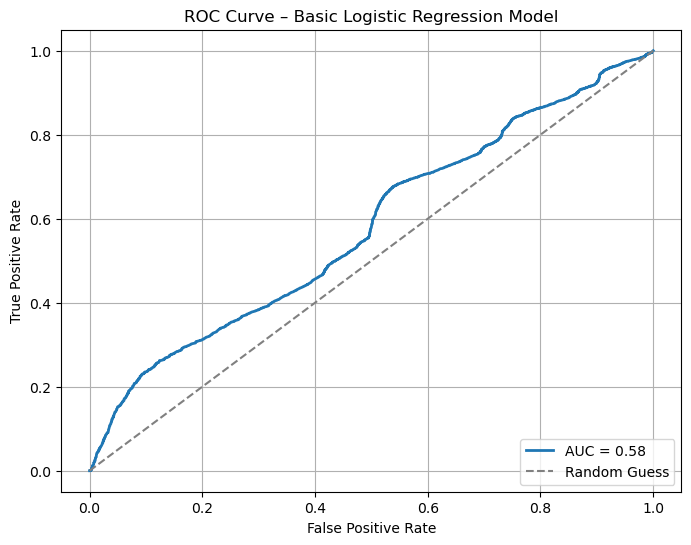

In [35]:
# Plotting the ROC Curve to understand the classifier performance visually

from sklearn.metrics import roc_curve, auc

# Getting the predicted probabilities for ICU=2 (positive class)
y_probs = log_model.predict_proba(X_test)[:, 1]

# Calculating False Positive Rate, True Positive Rate and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=2.0)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Basic Logistic Regression Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [43]:
# Showing the AUC score from the ROC Curve for better interpretability
print(f"AUC Score (Logistic Regression): {roc_auc:.2f}")



AUC Score (Logistic Regression): 0.58


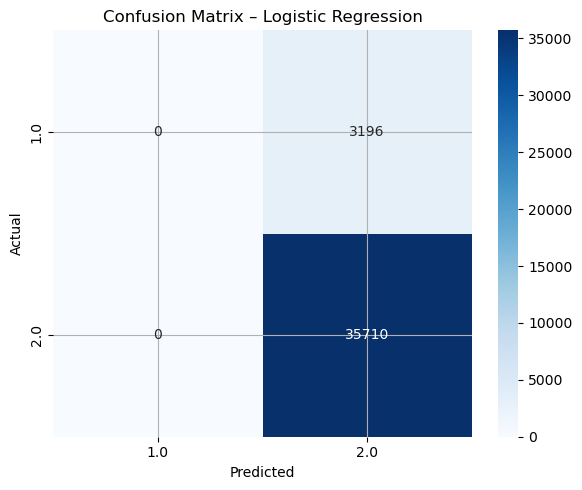

In [45]:
# Plotting the confusion matrix as a heatmap for visual clarity

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating predictions using the logistic regression model
y_pred_basic = log_model.predict(X_test)

# Creating confusion matrix
cm_basic = confusion_matrix(y_test, y_pred_basic)

# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues', xticklabels=[1.0, 2.0], yticklabels=[1.0, 2.0])
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(True)
plt.tight_layout()
plt.show()


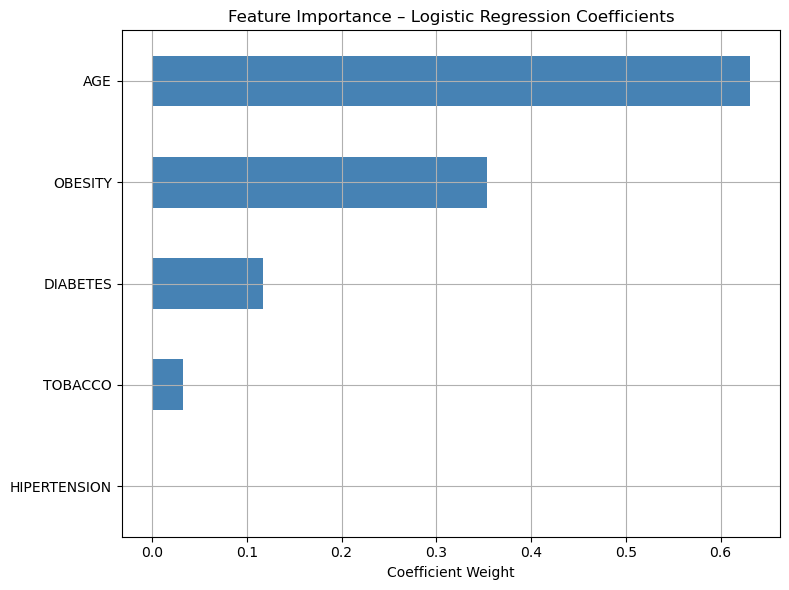

In [47]:
# Plotting feature importance using the logistic regression coefficients

# Getting the feature names and their corresponding coefficients
feature_names = X.columns
coefs = pd.Series(log_model.coef_[0], index=feature_names).sort_values()

# Creating the bar plot to visualise the importance
plt.figure(figsize=(8, 6))
coefs.plot(kind='barh', color='steelblue')
plt.title("Feature Importance – Logistic Regression Coefficients")
plt.xlabel("Coefficient Weight")
plt.grid(True)
plt.tight_layout()
plt.show()



In [49]:
# Performing 5-Fold Cross Validation on the Logistic Regression model
# Helps to check how stable the model is across different data splits

from sklearn.model_selection import cross_val_score

# Getting cross-validation scores based on accuracy
cv_scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')

# Printing all the scores from the 5 folds
print("Cross-Validation Accuracy Scores:", cv_scores)

# Showing the average accuracy and how much it varies
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [0.91865008 0.91867369 0.91867369 0.91867369 0.91864799]
Mean Accuracy: 0.92
Standard Deviation: 0.00


In [51]:
# Saving the trained logistic regression model to a file
# Good practice to save the model in case we need to load it again later

import joblib

# Exporting model using joblib
joblib.dump(log_model, 'basic_model_logistic_regression.pkl')

# Confirmation message
print("Model saved successfully as 'basic_model_logistic_regression.pkl'")


Model saved successfully as 'basic_model_logistic_regression.pkl'
